In [1]:
##Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import iqr
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!pip install imgkit

In [3]:
df = pd.read_csv('Downloads/statistic project/austo_automobile.csv')

### PROBLEM-1-Data Overview

In [4]:
#Checking sample of the data
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [5]:
!pip install dataframe_image

In [74]:
import dataframe_image as dfi

In [6]:

df.head(5)
dfi.export(df.head(), 'df_head.png')

In [5]:
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [8]:
df.tail(5)
dfi.export(df.tail(5), 'df_tail.png')

In [6]:
df.tail(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [10]:
from contextlib import redirect_stdout
with open('info.txt', 'w') as f:
    with redirect_stdout(f):
        df.info()

In [7]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


#### Describing the data in two seperate ways numerical and categorical dataset

In [12]:
df.describe(include='all').T
dfi.export(df.describe(include='all').T, 'df_tail.png')

In [8]:
# Obtaining summary of numerical and categorical datas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [14]:
df.select_dtypes(include = ['object']).describe().T
dfi.export(df.select_dtypes(include=['object']).describe().T, 'df_tail.png')

In [9]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
Gender,1528,4,Male,1199
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


In [10]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1581 
no. of columns:  14


Checking the NULL values

In [11]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

Gender             object
Partner_salary    float64
dtype: object

Missing Values

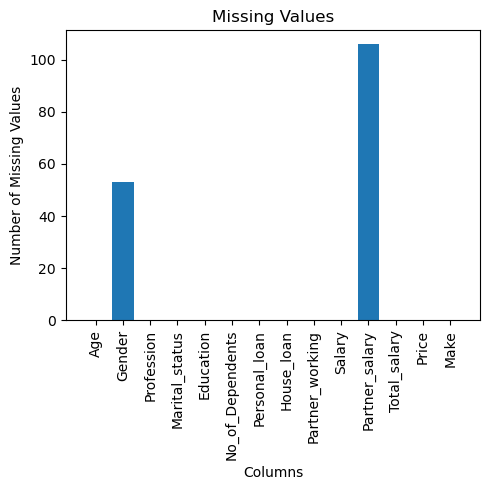

In [12]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
null_values = df.isnull().sum()

plt.figure(figsize=(5, 5))  # Adjust the size as needed
plt.bar(null_values.index, null_values.values)
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are long
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

plt.tight_layout() 
# Adjust the layout

In [13]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [14]:
df.Partner_salary.fillna(df.Partner_salary.mean(),inplace=True)

In [15]:
df.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

#### Checking the Irregularities

In [16]:
## Now first lets cehck the unique values in Gender and correct if any irregularities in this caterogy
df["Gender"].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [17]:
## As we can see their are spelling mistakes with word Female,## lets correct these spelling mistakes
df['Gender'].replace('Femal','Female',inplace = True)
df['Gender'].replace('Femle','Female',inplace = True)
df['Gender'].replace(np.nan,'Male',inplace = True)

In [18]:
## Now we have treated the bad data ( spelling mistakes) and can see that we have 3 unique values in Gender
## Now lets treat the blank values in Gender
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

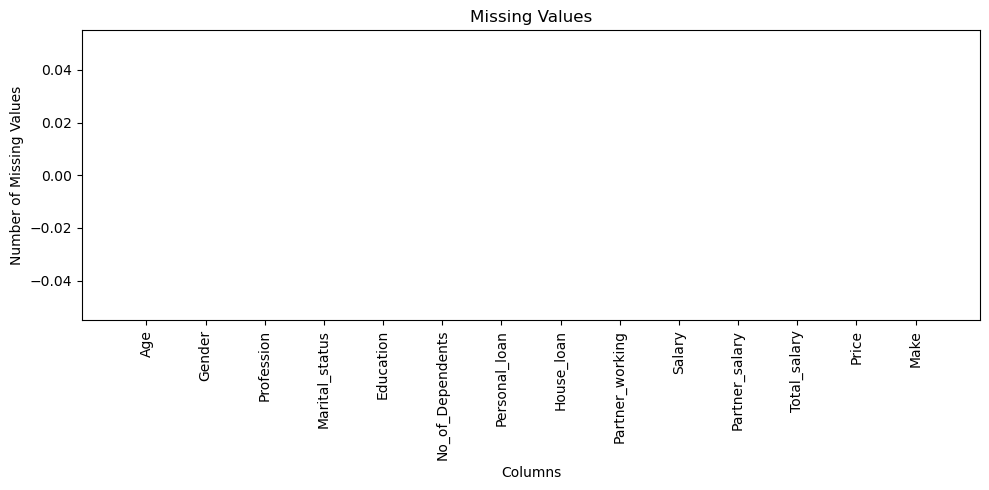

In [20]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
null_values = df.isnull().sum()

plt.figure(figsize=(10, 5))  # Adjust the size as needed
plt.bar(null_values.index, null_values.values)
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are long
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

plt.tight_layout()  # Adjust the layout
plt.savefig('missing_values.png', bbox_inches='tight')

Checking the Duplicate values

In [21]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


##### Now we have treated the bad data ( spelling mistakes) and can see that we have 2 unique values in Gender.
##### And there are no duplicate value 

In [22]:
df['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [23]:
df['Profession'].value_counts()

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [24]:
df['Marital_status'].value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [25]:
df['Education'].value_counts()

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

In [26]:
df['Personal_loan'].value_counts()

Personal_loan
Yes    792
No     789
Name: count, dtype: int64

In [27]:
df['House_loan'].value_counts()

House_loan
No     1054
Yes     527
Name: count, dtype: int64

In [28]:
df['Partner_working'].value_counts()

Partner_working
Yes    868
No     713
Name: count, dtype: int64

In [29]:
df['Make'].value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

### Problem - 1 - Univariate Analysis

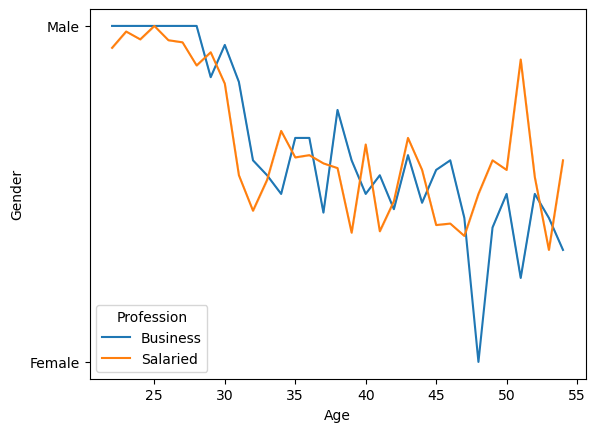

In [30]:
sns.lineplot(data=df,x = 'Age' , y = 'Gender', ci = False ,hue='Profession');

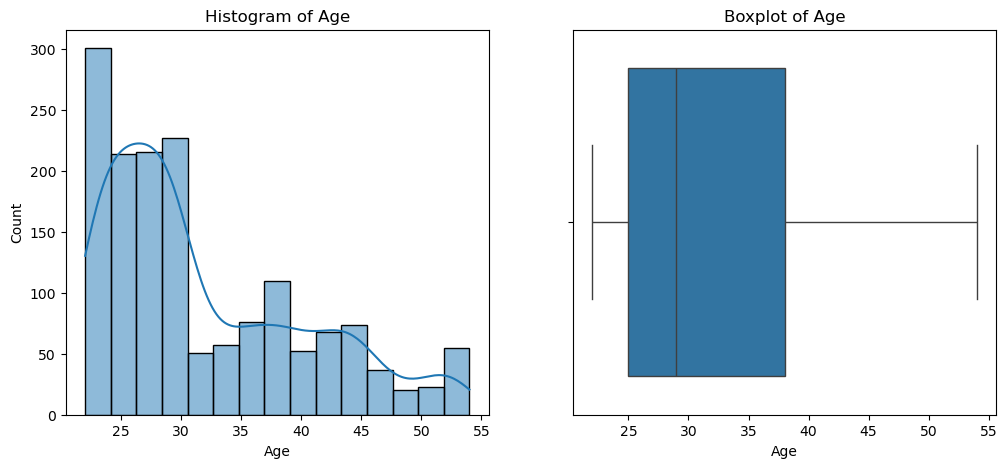

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='Age', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Age')
sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot of Age');
plt.savefig('age.png', bbox_inches='tight')

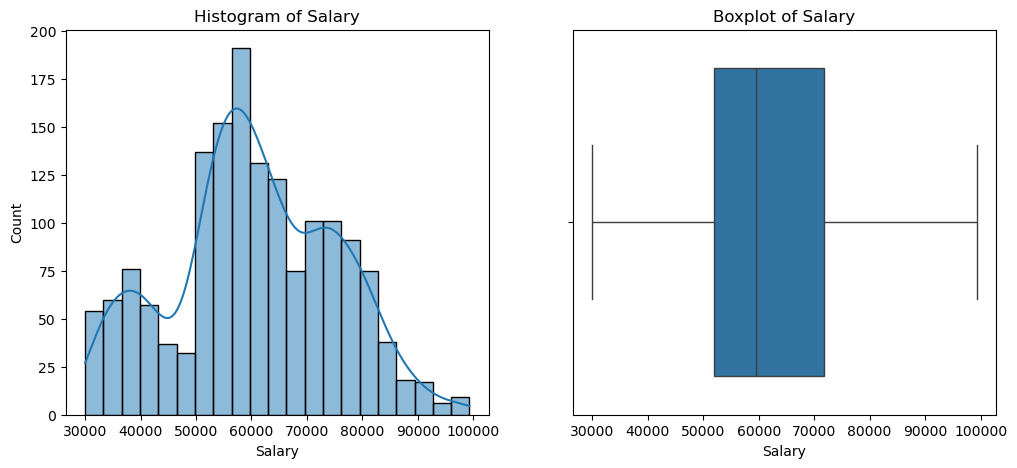

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='Salary', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Salary')
sns.boxplot(data=df, x='Salary', ax=axes[1])
axes[1].set_title('Boxplot of Salary');
plt.savefig('salary.png', bbox_inches='tight')

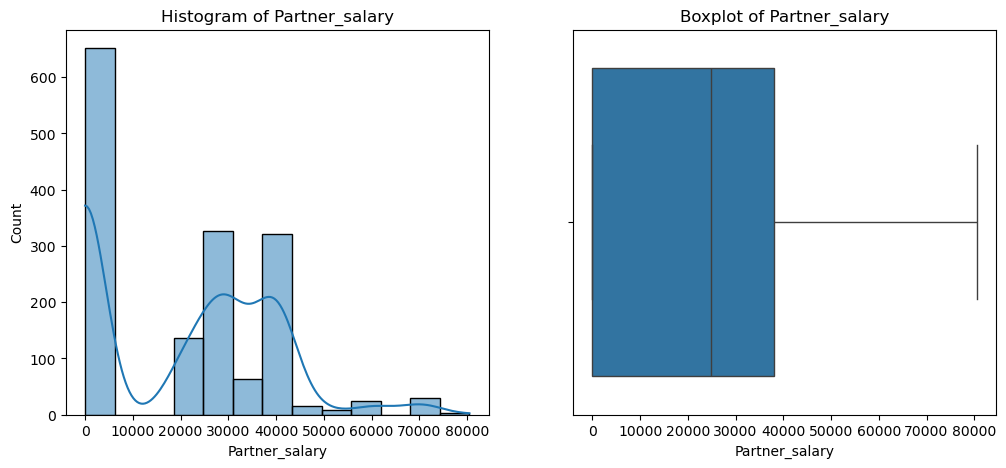

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='Partner_salary', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Partner_salary')
sns.boxplot(data=df, x='Partner_salary', ax=axes[1])
axes[1].set_title('Boxplot of Partner_salary');
plt.savefig('partner salary.png', bbox_inches='tight')

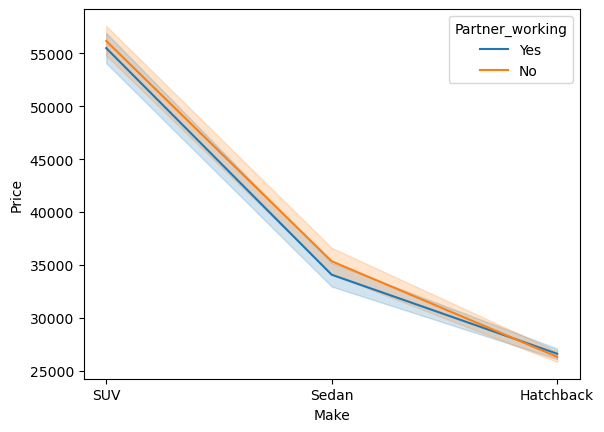

In [34]:
sns.lineplot(data=df,x='Make',y='Price',hue = 'Partner_working');

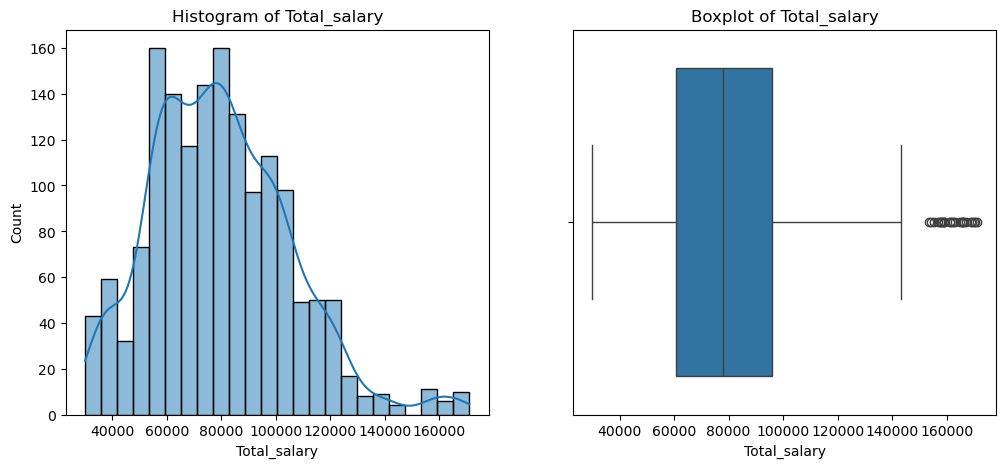

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='Total_salary', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Total_salary')
sns.boxplot(data=df, x='Total_salary', ax=axes[1])
axes[1].set_title('Boxplot of Total_salary');
plt.savefig('total salary.png', bbox_inches='tight')

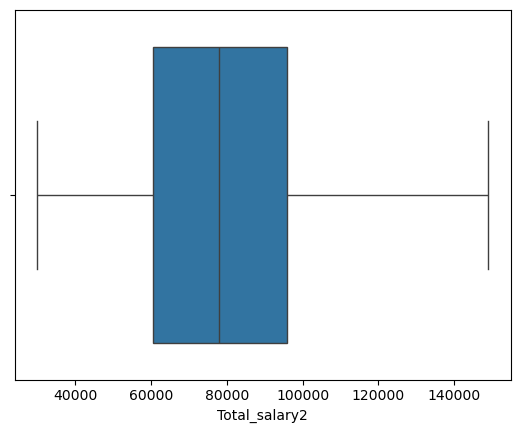

In [51]:
## with the help of IQR method by caping the outliner values to upperlimit and treated the outliner and got the output
sns.boxplot(x='Total_salary2', data =df);
plt.savefig('total salary2.png', bbox_inches='tight')

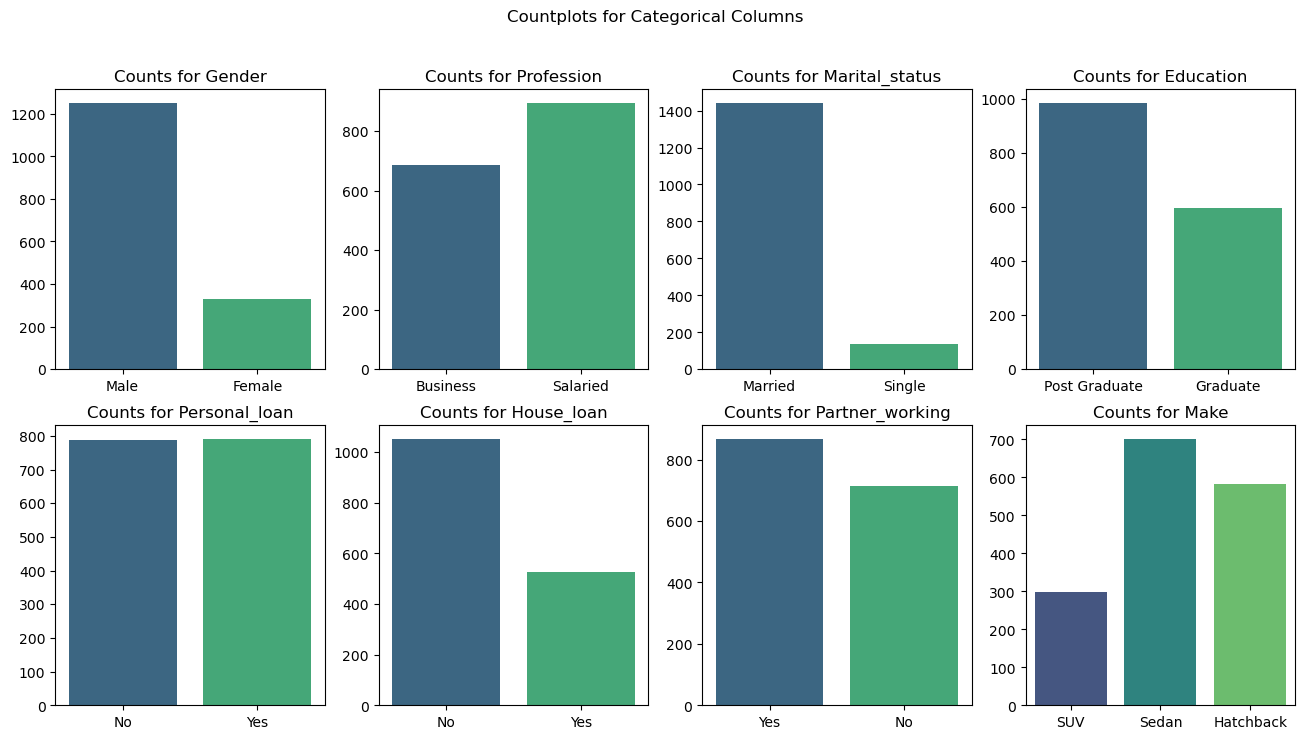

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Countplots for Categorical Columns")

# Specify the categorical columns
categorical_columns = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working','Make']
# Loop through columns and create count plots
for i, column in enumerate(categorical_columns):
    row = i // 4
    col = i % 4
    sns.countplot(data=df, x=column, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'Counts for {column}')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('');
    plt.savefig('countplots1.png', bbox_inches='tight')

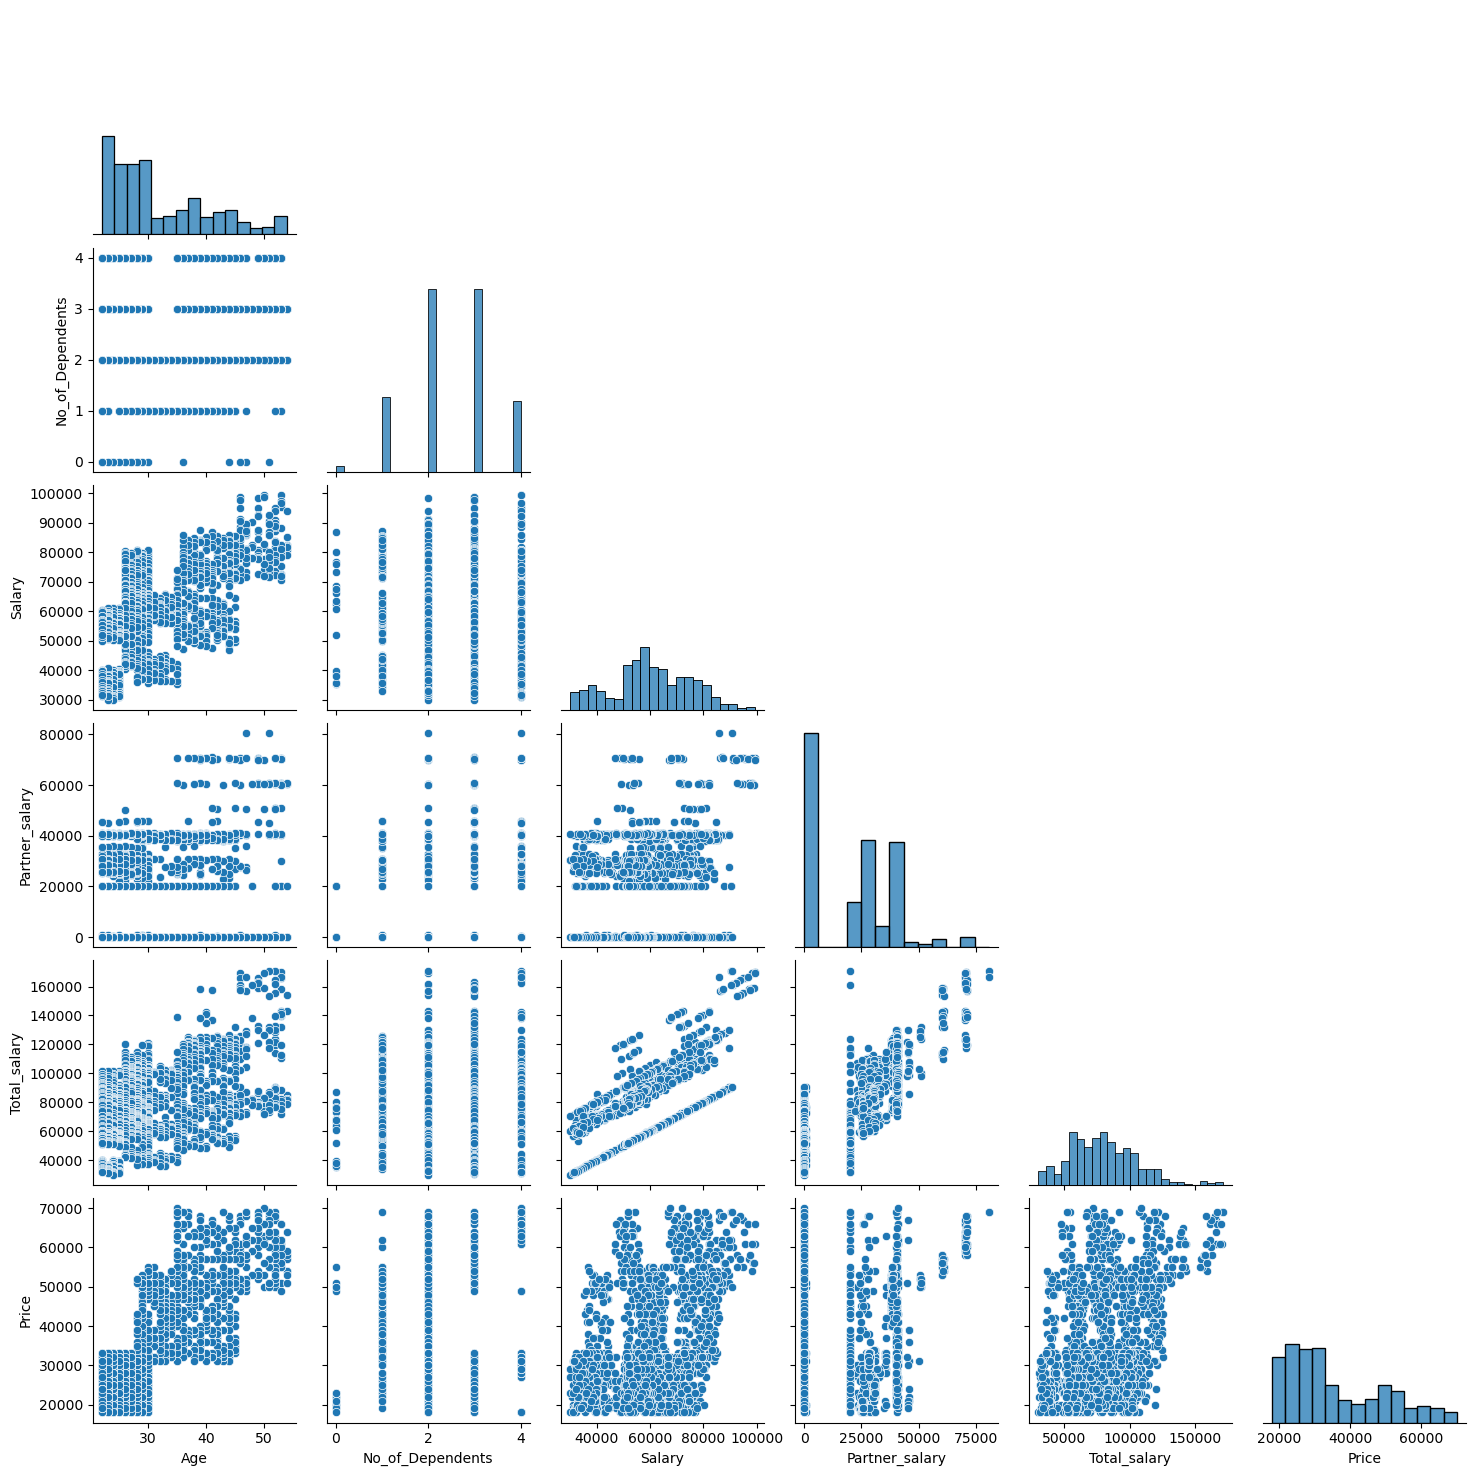

In [37]:
figsize=(12, 5)
sns.pairplot(data=df, vars=['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price'],corner=True);
plt.savefig('Pairplot.png', bbox_inches='tight')

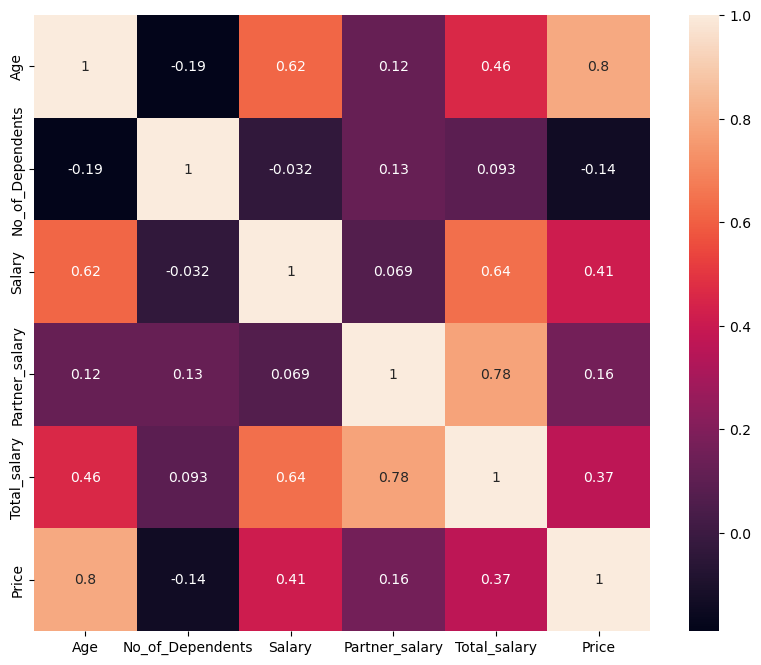

In [38]:
df_selected = df[['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']]
## Calculate the correlation matrix
corr = df_selected.corr()
plt.figure(figsize=(10,8))
## Draw the heatmap
sns.heatmap(corr, annot=True, cbar=True, square=True);
plt.savefig('Heatmap.png')

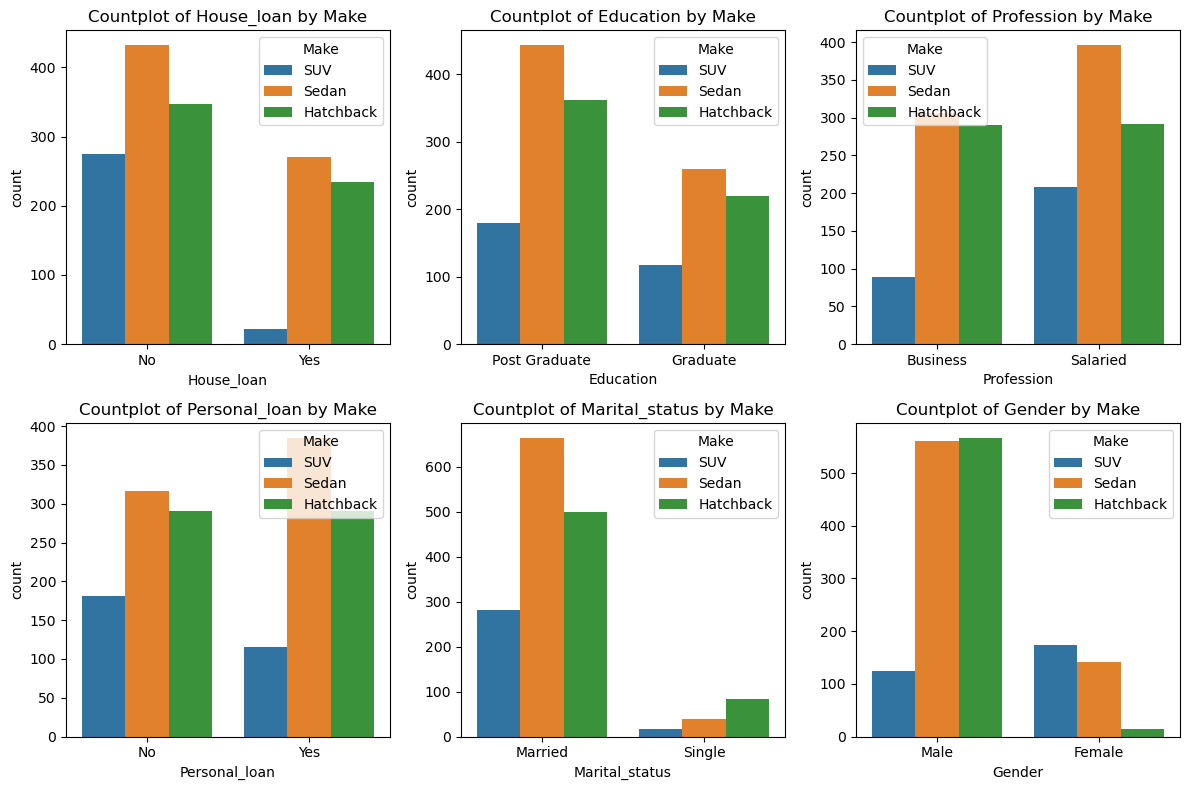

In [39]:
variables = ['House_loan', 'Education', 'Profession', 'Personal_loan', 'Marital_status', 'Gender']

# Define the size and layout of the grid
n = len(variables)
ncols = n // 2  # number of columns, assuming you want 2 rows
nrows = 2  # number of rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows*4))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Create a countplot for each variable
for ax, var in zip(axes, variables):
    sns.countplot(x=var, data=df, hue='Make', ax=ax)
    ax.set_title(f'Countplot of {var} by Make')

# Remove any unused subplots
for ax in axes[n:]:
    ax.remove()

plt.tight_layout()  # Adjust the layout to minimize overlaps
plt.savefig('countplot3', bbox_inches='tight')
plt.show()

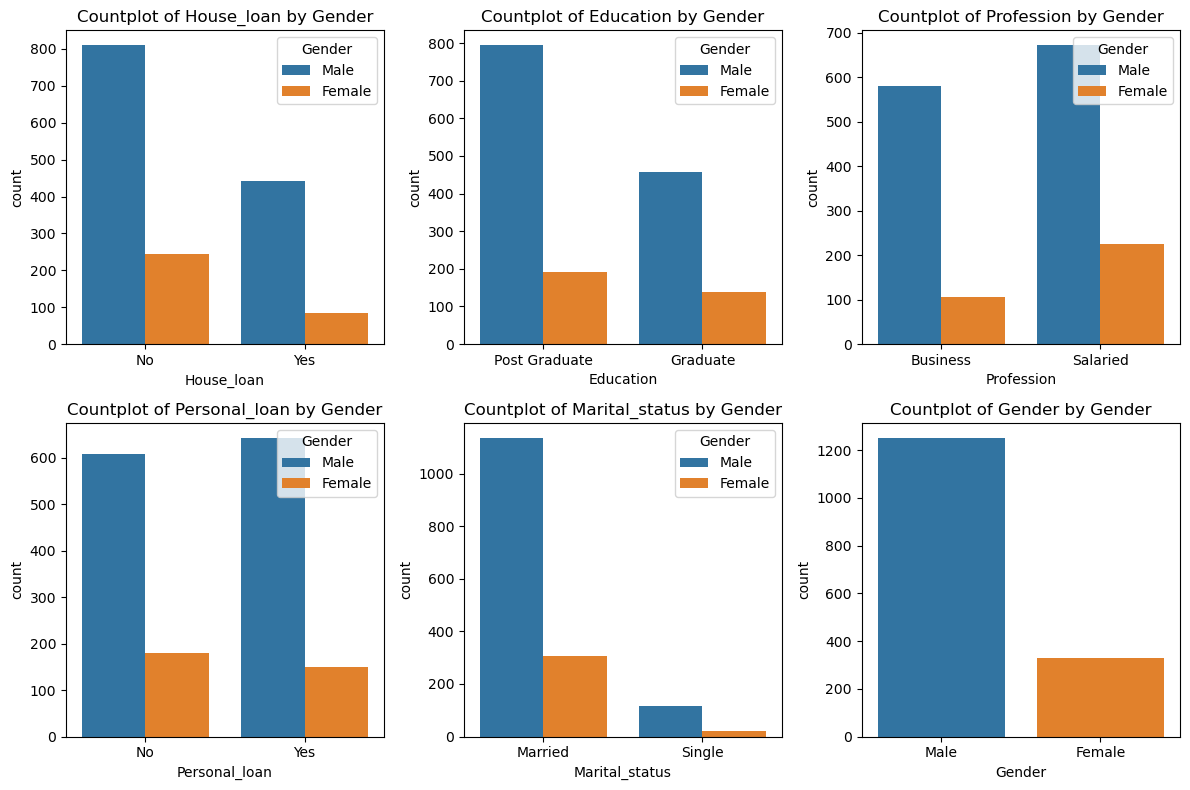

In [40]:
variables = ['House_loan', 'Education', 'Profession', 'Personal_loan', 'Marital_status', 'Gender']

# Define the size and layout of the grid
n = len(variables)
ncols = n // 2  # number of columns, assuming you want 2 rows
nrows = 2  # number of rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows*4))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Create a countplot for each variable
for ax, var in zip(axes, variables):
    sns.countplot(x=var, data=df, hue='Gender', ax=ax)
    ax.set_title(f'Countplot of {var} by Gender')

# Remove any unused subplots
for ax in axes[n:]:
    ax.remove()

plt.tight_layout()  # Adjust the layout to minimize overlaps

plt.savefig('countplot4', bbox_inches='tight')
plt.show()

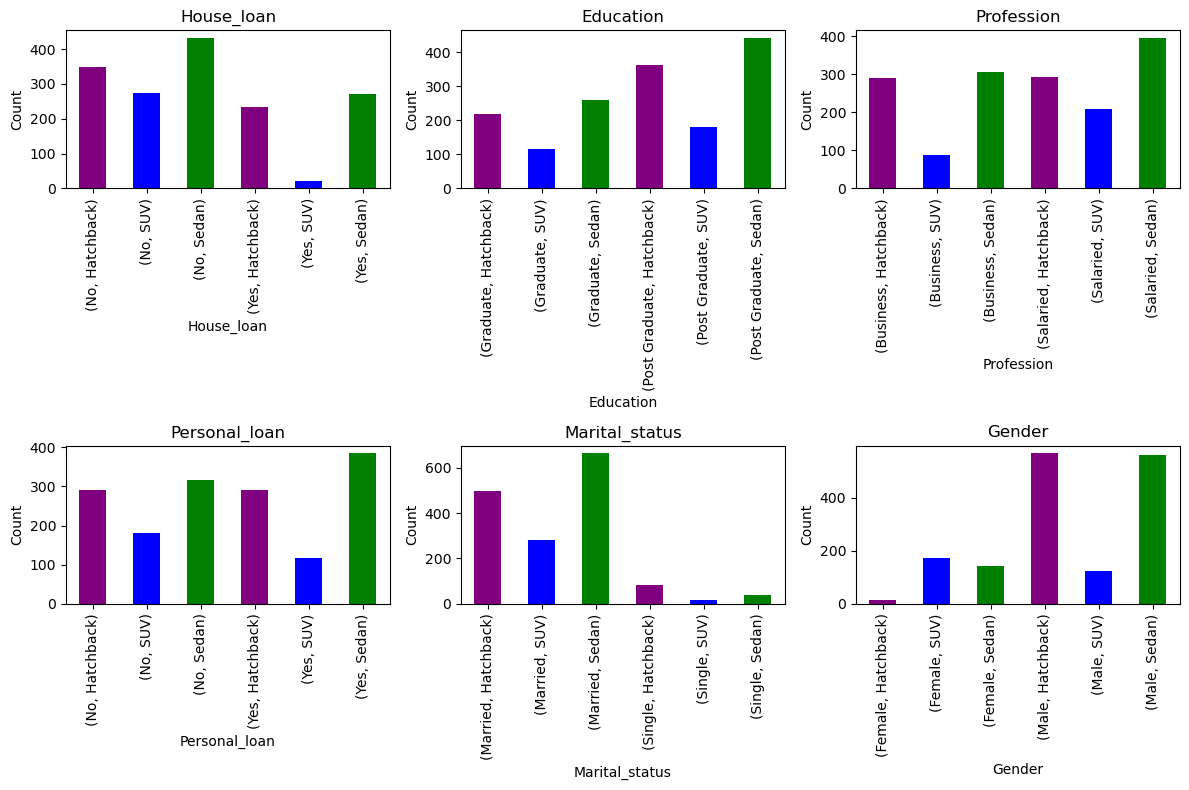

In [41]:
categories = ['House_loan', 'Education', 'Profession', 'Personal_loan', 'Marital_status', 'Gender']

# Define the size and layout of the grid
n = len(categories)
ncols = n // 2  # number of columns, assuming you want 2 rows
nrows = 2  # number of rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows*4))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

for ax, category in zip(axes, categories):
    # Count the occurrences of each category
    count = df.groupby([category, 'Make']).size()

    # Create the bar plot
    count.plot(kind='bar', stacked=True, ax=ax, color=['purple','blue','green'])

    # Set the title and labels
    ax.set_title(category)
    ax.set_xlabel(category)
    ax.set_ylabel('Count')

# Remove any unused subplots
for ax in axes[n:]:
    ax.remove()

plt.tight_layout()  # Adjust the layout to minimize overlaps
plt.savefig('countplot5', bbox_inches='tight')
plt.show()

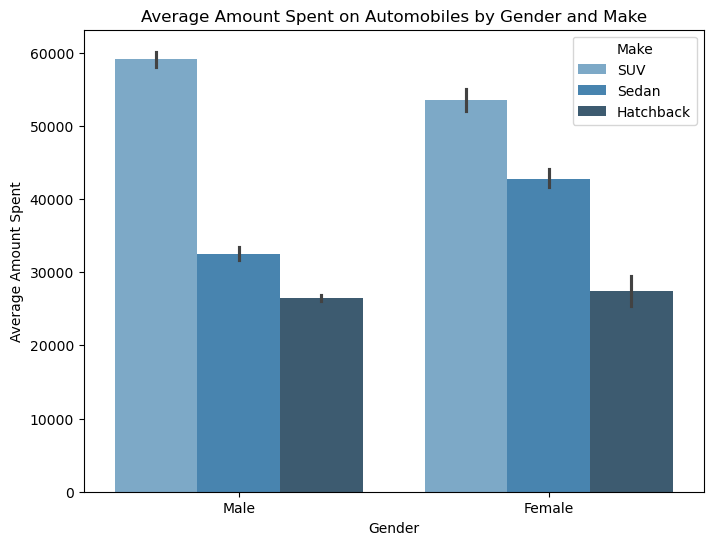

In [42]:
# Create a bar plot with 'Make' as the hue
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Price', hue='Make', data=df, palette="Blues_d")
plt.title('Average Amount Spent on Automobiles by Gender and Make')
plt.xlabel('Gender')
plt.ylabel('Average Amount Spent')
plt.savefig('countplot6', bbox_inches='tight')
plt.show()

In [43]:
# Filter the DataFrame to include only individuals who took a personal loan
loan_df = df[df['Personal_loan'] == 'Yes']

# Calculate the total amount spent on purchasing automobiles by these individuals
total_spent = loan_df['Price'].mean()

print(f'Total amount spent on purchasing automobiles by individuals who took a personal loan: {total_spent}')


Total amount spent on purchasing automobiles by individuals who took a personal loan: 34457.07070707071


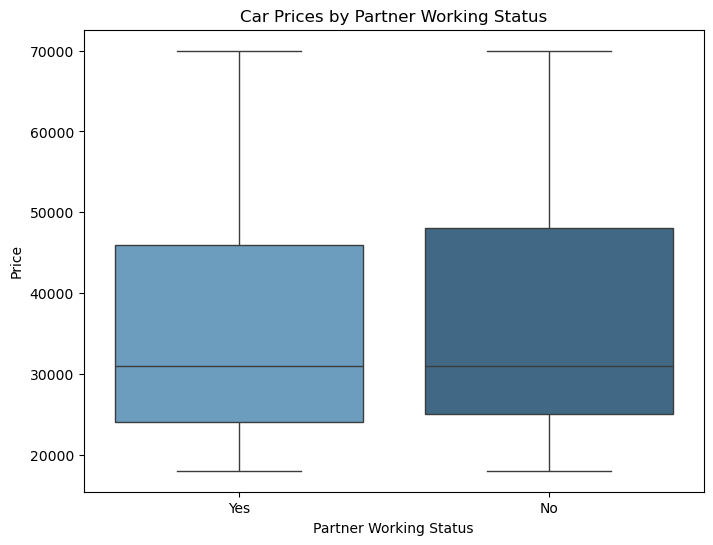

In [44]:
# Create a boxplot to visualize the distribution of car prices for individuals with and without a working partner
plt.figure(figsize=(8, 6))
sns.boxplot(x='Partner_working', y='Price', data=df, palette="Blues_d")
plt.title('Car Prices by Partner Working Status')
plt.xlabel('Partner Working Status')
plt.ylabel('Price')
plt.show()

In [72]:
df.groupby(['Partner_working','Price']).size().unstack()

Price,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,...,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000
Partner_working,,,,,,,,,,,,,,,,,,,,,
No,16,17,32,16,24,38,29,27,22,18,...,7,6,7,8,5,5,4,5,4,1
Yes,21,28,47,23,31,36,35,20,32,33,...,11,6,5,5,3,7,4,6,7,1


In [45]:
df.groupby(['Gender','Make']).size().unstack()

Make,Hatchback,SUV,Sedan
Gender,,,
Female,15,173,141
Male,567,124,561


In [46]:
df.groupby(['Profession','Make']).size().unstack()

Make,Hatchback,SUV,Sedan
Profession,,,
Business,290,89,306
Salaried,292,208,396


In [47]:
pd.crosstab(df['Gender'], df['Profession'], margins=True, normalize = True)

Profession,Business,Salaried,All
Gender,,,
Female,0.066414,0.141682,0.208096
Male,0.366856,0.425047,0.791904
All,0.433270,0.566730,1.000000


In [48]:
pd.crosstab(df['Profession'], df['Make'], margins=True, normalize = True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,0.183428,0.056293,0.193548,0.43327
Salaried,0.184693,0.131562,0.250474,0.56673
All,0.368121,0.187856,0.444023,1.00000


In [49]:
pd.crosstab(df['Gender'], df['Make'], margins=True, normalize = True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.009488,0.109424,0.089184,0.208096
Male,0.358634,0.078431,0.354839,0.791904
All,0.368121,0.187856,0.444023,1.000000


In [50]:
df.groupby('Gender') ['Price'].count()

Gender
Female     329
Male      1252
Name: Price, dtype: int64

Make
Sedan        45.386905
Hatchback    41.220238
SUV          13.392857
Name: proportion, dtype: float64


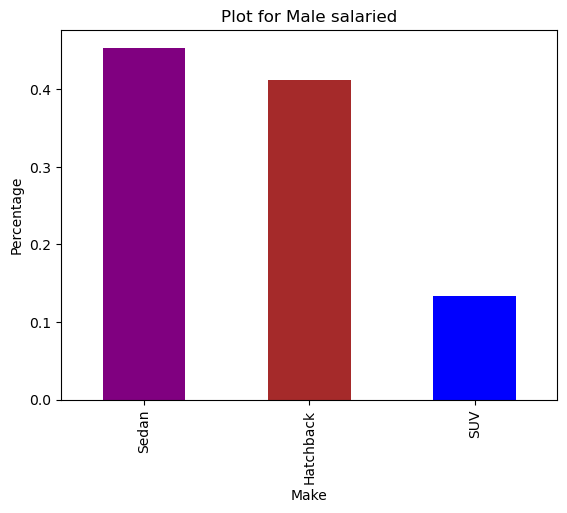

In [51]:
df1 = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Salaried')]
df2 = df1['Make'].value_counts(normalize=True)
print(df2 * 100)
df2.plot(kind='bar', color=['purple', 'brown','blue'])
plt.title('Plot for Male salaried')
plt.xlabel('Make')
plt.ylabel('Percentage')
plt.show()

Make
Hatchback    50.000000
Sedan        44.137931
SUV           5.862069
Name: proportion, dtype: float64


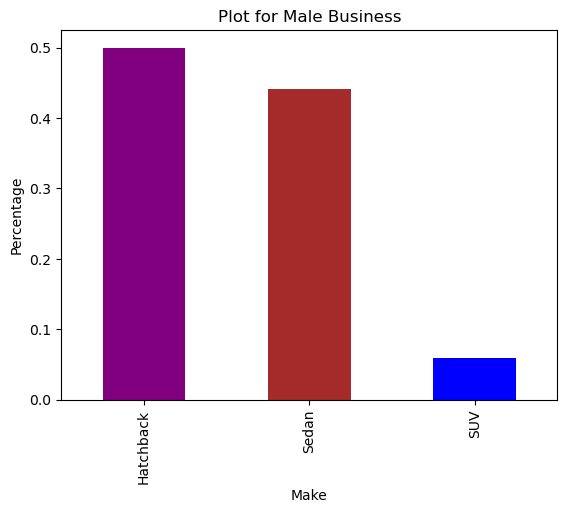

In [52]:
df1 = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Business')]
df2 = df1['Make'].value_counts(normalize=True)
print(df2 * 100)
df2.plot(kind='bar', color=['purple', 'brown','blue'])
plt.title('Plot for Male Business')
plt.xlabel('Make')
plt.ylabel('Percentage')
plt.show()

Make
SUV          52.678571
Sedan        40.625000
Hatchback     6.696429
Name: proportion, dtype: float64


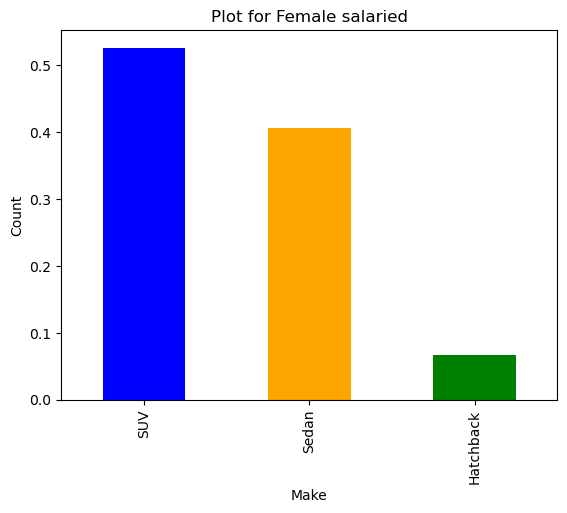

In [53]:

df3 = df[(df['Gender'] == 'Female') & (df['Profession'] == 'Salaried')]
df4 = df3['Make'].value_counts(normalize=True)
print(df4*100)
df4.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Plot for Female salaried")
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

Make
SUV      52.380952
Sedan    47.619048
Name: proportion, dtype: float64


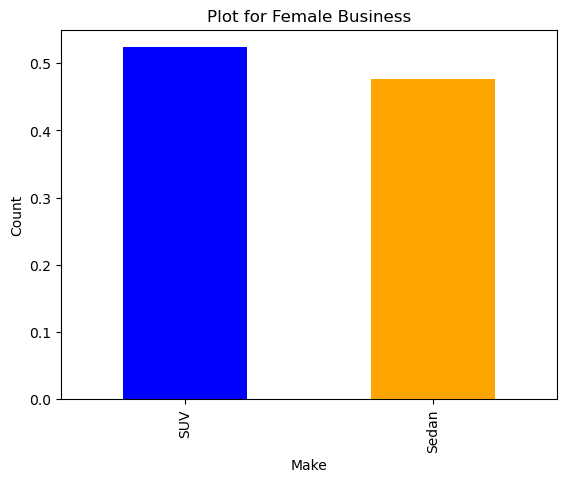

In [54]:
df3 = df[(df['Gender'] == 'Female') & (df['Profession'] == 'Business')]
df4 = df3['Make'].value_counts(normalize=True)
print(df4*100)
df4.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Plot for Female Business")
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

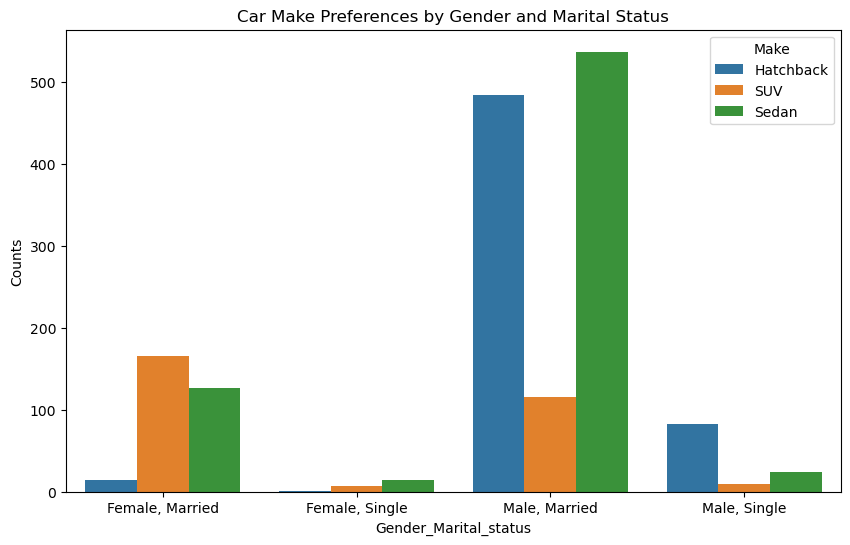

Make,Hatchback,SUV,Sedan
Gender_Marital_status,,,
"Female, Married",14,166,127
"Female, Single",1,7,14
"Male, Married",484,115,537
"Male, Single",83,9,24


In [55]:
# Assuming 'df' is your DataFrame and it has columns 'Gender', 'Marital_status', and 'Make'

# Create a new column combining 'Gender' and 'Marital_status'
df['Gender_Marital_status'] = df['Gender'] + ', ' + df['Marital_status']

# Create a DataFrame for plotting
df_plot = df.groupby(['Gender_Marital_status', 'Make']).size().reset_index(name='Counts')


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender_Marital_status', y='Counts', hue='Make', data=df_plot)
plt.title('Car Make Preferences by Gender and Marital Status')
plt.show()
df.groupby('Gender_Marital_status') ['Make'].value_counts().unstack()

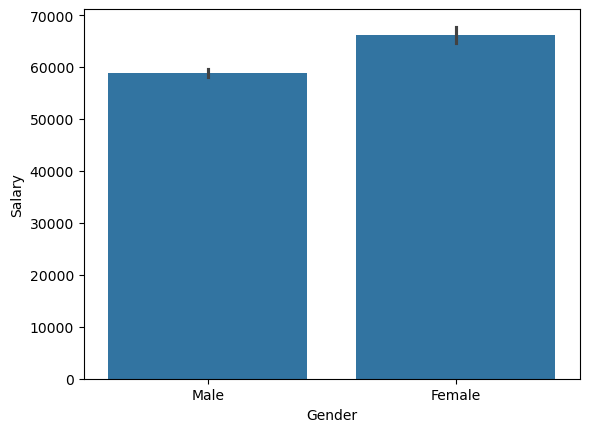

In [56]:
sns.barplot(data=df,x='Gender',y='Salary');

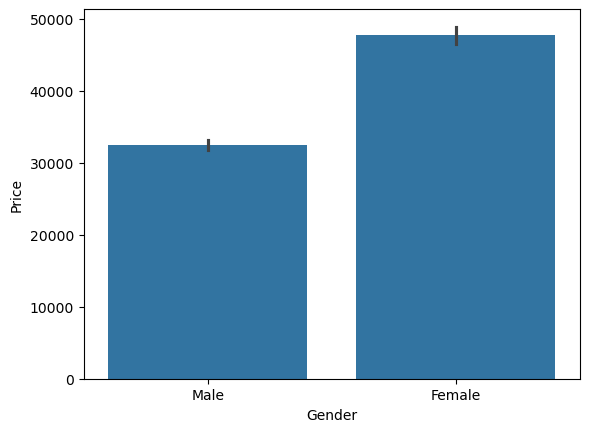

In [57]:
sns.barplot(data=df,x='Gender',y='Price');

Marital_status,Married,Single
Gender,,
Female,307,22
Male,1136,116


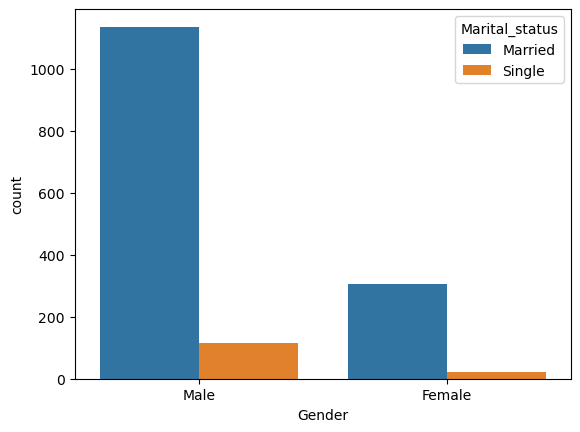

In [58]:
sns.countplot(x='Gender',hue='Marital_status',data=df);
df.groupby(['Gender', 'Marital_status']).size().unstack()

In [59]:
df.groupby('Gender')['Price'].mean().reset_index()

,Gender,Price
0,Female,47705.167173
1,Male,32416.134185


In [60]:
df.groupby('Gender')['Price'].median().reset_index()

,Gender,Price
0,Female,49000.0
1,Male,29000.0


In [61]:
df.groupby('Personal_loan')['Price'].median().reset_index()

,Personal_loan,Price
0,No,32000.0
1,Yes,31000.0


In [62]:
df.groupby('Personal_loan')['Price'].mean().reset_index()

,Personal_loan,Price
0,No,36742.712294
1,Yes,34457.070707


In [63]:
df.groupby('Partner_working')['Price'].median().reset_index()

,Partner_working,Price
0,No,31000.0
1,Yes,31000.0


In [64]:
df.groupby('Partner_working')['Price'].mean().reset_index()

,Partner_working,Price
0,No,36000.000000
1,Yes,35267.281106


In [65]:
df.groupby('Partner_working')['Price'].sum()

Partner_working
No     25668000
Yes    30612000
Name: Price, dtype: int64

In [66]:
df.groupby('Personal_loan')['Price'].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

In [67]:
df.groupby('Gender')['Price'].sum()

Gender
Female    15695000
Male      40585000
Name: Price, dtype: int64

In [68]:
df[(df['Gender'] == 'Female') & (df['Marital_status'] == 'Married')]['Price'].mean()

47918.5667752443

In [69]:
df[(df['Gender'] == 'Male') & (df['Marital_status'] == 'Married')]['Price'].mean()

32525.528169014084

In [70]:
df[(df['Gender'] == 'Female') & (df['Marital_status'] == 'Single')]['Price'].mean()

44727.27272727273

In [71]:
df[(df['Gender'] == 'Male') & (df['Marital_status'] == 'Single')]['Price'].mean()

31344.827586206895

# Problem-2

In [88]:
path = ('Downloads/statistic project/godigt_cc_data.xlsx')
xl = pd.ExcelFile(path)
print(xl.sheet_names)

['Sheet1', 'Sheet3']


In [89]:
df11 = xl.parse('Sheet1')

In [90]:
df11.shape

(8448, 28)

In [91]:
#Check for Null Values
df11.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [92]:
#Filling Null Values
df11['Transactor_revolver']= df11['Transactor_revolver'].fillna("NA")

In [93]:
df11.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

In [94]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [95]:
df11.head(5)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [99]:
df11.head(5)
dfi.export(df11.head(5), 'df_head.png')

In [97]:
df11.tail(5)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [95]:
dups = df11.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [96]:
df11.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
userid,8448.0,NaN,NaN,NaN,4224.5,1.0,2112.75,4224.5,6336.25,8448.0,2438.87187
card_no,8448,11,4262 41XX XXXX XXXX,2084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_bin_no,8448.0,NaN,NaN,NaN,436747.044508,376916.0,426241.0,437551.0,438439.0,524178.0,30489.752417
Issuer,8448,3,Visa,7279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_type,8448,15,rewards,1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_source_date,8448,NaN,NaN,NaN,2009-06-19 13:35:17.045454592,1998-07-24 00:00:00,2004-01-07 18:00:00,2009-05-24 12:00:00,2014-11-27 06:00:00,2020-06-17 00:00:00,NaN
high_networth,8448,5,A,1740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_30,8448.0,NaN,NaN,NaN,0.292377,0.0,0.0,0.0,1.0,1.0,0.454881
active_60,8448.0,NaN,NaN,NaN,0.494792,0.0,0.0,0.0,1.0,1.0,0.500002
active_90,8448.0,NaN,NaN,NaN,0.642045,0.0,0.0,1.0,1.0,1.0,0.479427


In [97]:
df11["Occupation_at_source"].unique()

array(['Self Employed', 0, 'Student', 'Salaried', 'Retired', 'Housewife'],
      dtype=object)

In [98]:
df11['Occupation_at_source'].replace(0,'Self Employed',inplace = True)

In [99]:
df11["Occupation_at_source"].unique()

array(['Self Employed', 'Student', 'Salaried', 'Retired', 'Housewife'],
      dtype=object)

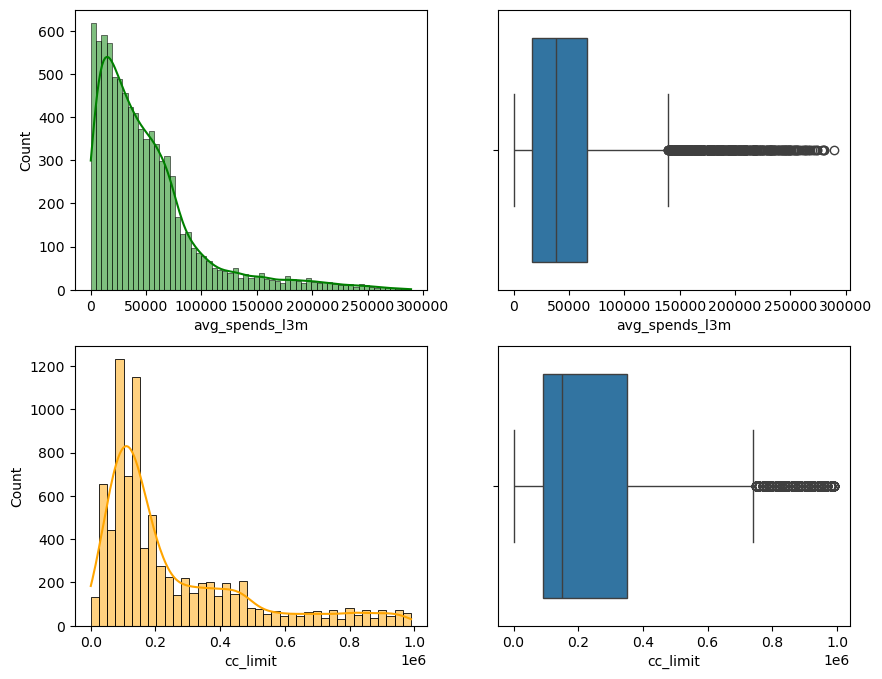

In [105]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df11['avg_spends_l3m'], kde=True, ax=axes[0][0],color = 'green')
sns.boxplot(x='avg_spends_l3m', data=df11, ax=axes[0][1])
sns.histplot(df11['cc_limit'] , kde=True, ax=axes[1][0],color = 'orange')
sns.boxplot(x='cc_limit', data=df11 , ax=axes[1][1])
plt.show()

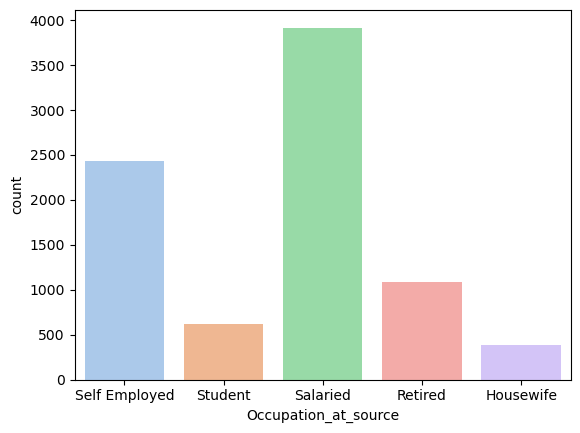

In [101]:
## Categorical Variable
sns.countplot(x='Occupation_at_source', data=df11, palette='pastel');

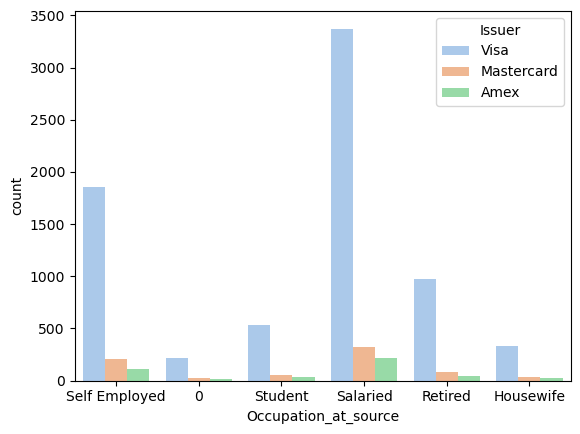

In [111]:
sns.countplot(x='Occupation_at_source', hue='Issuer', data=df11,palette='pastel');

In [103]:
pd.crosstab(df11['Issuer'], df11['Occupation_at_source'], margins=True, normalize = True)

Occupation_at_source,Housewife,Retired,Salaried,Self Employed,Student,All
Issuer,,,,,,
Amex,0.002367,0.004853,0.026160,0.014796,0.004025,0.052202
Mastercard,0.004143,0.009233,0.038234,0.027699,0.006866,0.086174
Visa,0.038944,0.114820,0.399384,0.245857,0.062618,0.861624
All,0.045455,0.128906,0.463778,0.288352,0.073509,1.000000


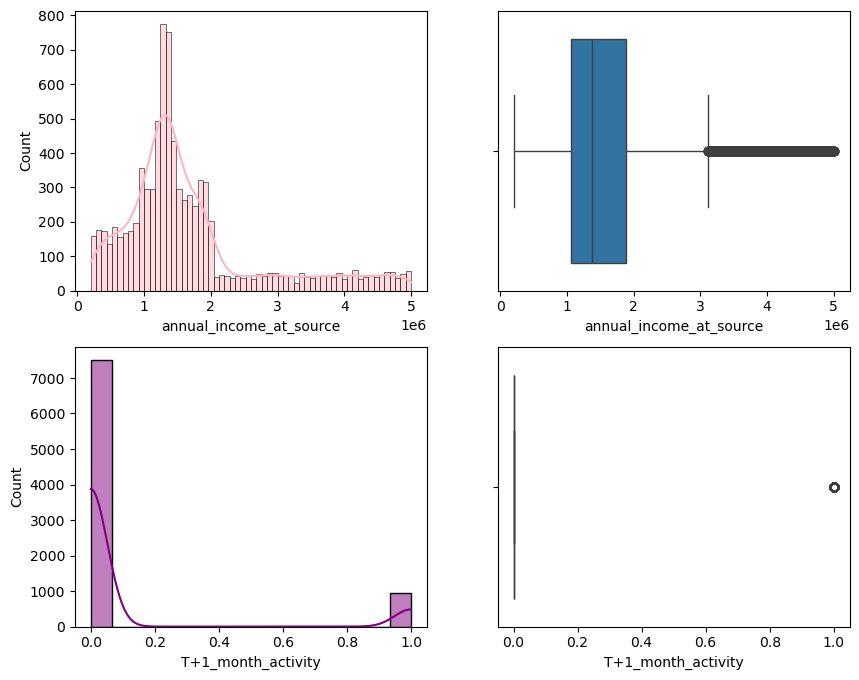

In [109]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df11['annual_income_at_source'], kde=True, ax=axes[0][0],color='lightpink')
sns.boxplot(x='annual_income_at_source', data=df11, ax=axes[0][1])
sns.histplot(df11['T+1_month_activity'] , kde=True, ax=axes[1][0],color='purple')
sns.boxplot(x='T+1_month_activity', data=df11 , ax=axes[1][1])
plt.show()

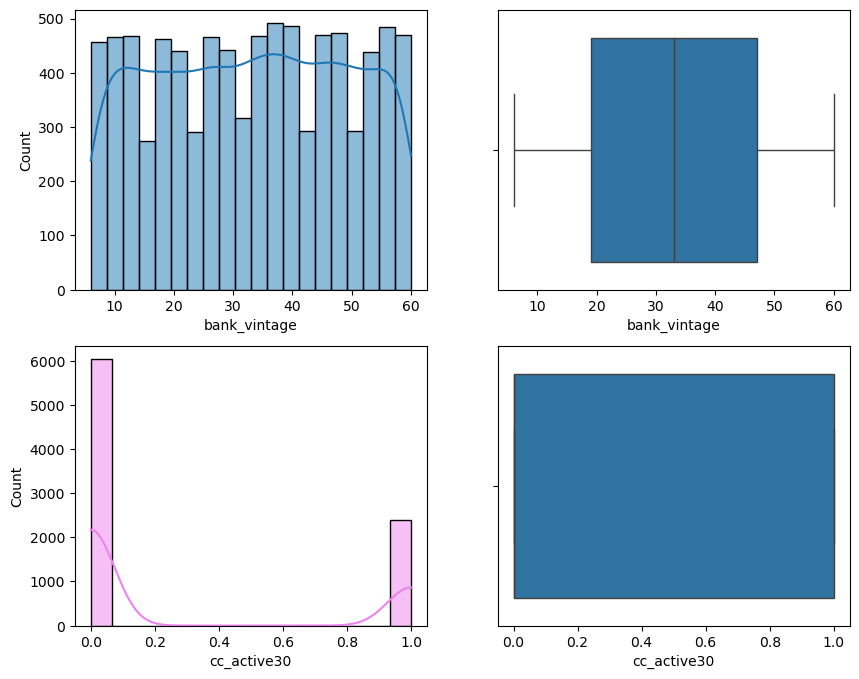

In [110]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df11['bank_vintage'], kde=True, ax=axes[0][0])
sns.boxplot(x='bank_vintage', data=df11, ax=axes[0][1])
sns.histplot(df11['cc_active30'] , kde=True, ax=axes[1][0],color='violet')
sns.boxplot(x='cc_active30', data=df11 , ax=axes[1][1])
plt.show()